**Detection of hand written digits from two by two**

Trying to locate 1 from modified mnist dataset

In [ ]:
import matplotlib as plt
import numpy as np
import random
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.backend import binary_crossentropy
from keras.datasets import mnist
from scipy import ndimage

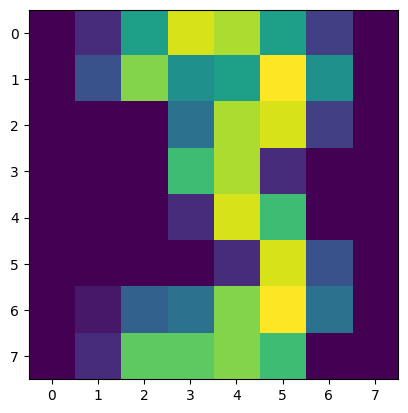

In [ ]:
#Old
digits = datasets.load_digits()
plt.pyplot.imshow(digits.images[13])

In [ ]:
def gen_2b2_f(n,r,t):
  #n is number of images to be generated
  #r is maximum degree to be rotated by
  #t is the target number
  two_by_two = np.zeros((n,16,16))
  quads = np.zeros((n,4))
  labels = np.zeros(n)
  F_2b2 = np.zeros((n,256))
  for i in range(n):
    im = np.random.randint(0,1796,4)
    for j in range(4):
      quads[i,j] = (digits.target[im[j]] == t)
    labels[i] = (np.any(quads[i,:] == 1))
    a_im = ndimage.rotate(digits.images[im[0]], random.randint(-r,r),reshape=False)
    b_im = ndimage.rotate(digits.images[im[1]], random.randint(-r,r),reshape=False)
    c_im = ndimage.rotate(digits.images[im[2]], random.randint(-r,r),reshape=False)
    d_im = ndimage.rotate(digits.images[im[3]], random.randint(-r,r),reshape=False)
    a=np.concatenate((a_im,b_im),axis=1)
    b=np.concatenate((c_im,d_im),axis=1)
    two_by_two[i] = np.concatenate((a,b),axis=0)
  return two_by_two,labels,quads

In [ ]:
#OG/old
n = 2000
a = 0
X_train, Y_train, Quad_Train= gen_2b2_f(n,a,4)
X_test, Y_test, Quad_Test = gen_2b2_f(500,a,4)

In [ ]:
# #Create the CNN model OLD
model_3 = Sequential()

# #Adding convolutional and maxpooling layers
model_3.add(Conv2D(filters=32, kernel_size=2, activation='relu',padding='same', input_shape=(16,16,1)))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Conv2D(filters=128, kernel_size=3, activation='relu',padding='same'))
#model_2.add(MaxPooling2D(pool_size=(2, 2)))

# #Flattening the result into a vector
model_3.add(Flatten())

# #Adding a dense output layer
model_3.add(Dense(100, activation = 'relu'))
model_3.add(Dense(20, activation = 'relu'))
#model_3.add(Dense(8, activation = 'relu'))
model_3.add(Dense(1, activation = 'sigmoid'))
model_3.compile(optimizer='sgd', metrics=['binary_accuracy'], loss='binary_crossentropy')

# fit
model_3.fit(X_train, Y_train, batch_size=128, epochs=100,verbose=0)#,validation_data=(X_test,Y_test))

#score
score3 = model_3.evaluate(X_test, Y_test, verbose=0)
#print("Test loss:", score3[0])
#print("Test accuracy:", score3[1])

35.0


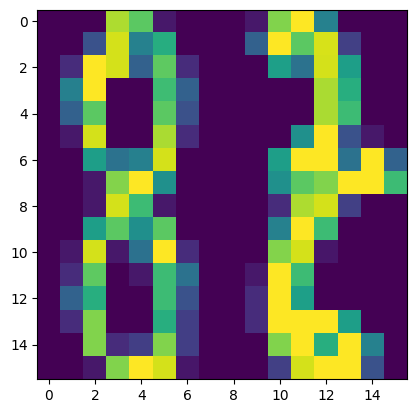

In [ ]:
tbt, l, q = gen_2b2_f(100,0,2)
print(np.sum(q))
plt.pyplot.imshow(tbt[0])

In [ ]:
def findMyNum(t,X_2, Y_2, Quads2):
  #X_1, Y_1, Quads1 = gen_2b2_f(1,0,t)
  check=1
  while check == 1:
    X_1, Y_1, Quads1= gen_2b2_f(1,0,t)
    if(Y_1==1):
      check=0

  answers = np.zeros(4)
  if Y_1==0:
    print("Target number not in image")
  else:
    #for loop to look through the dataset
    for i in range(4):
      im1=np.zeros((1,16,16))
      #replace 3/4s of the image with constructed one
      if i==0:
        im1[0,0:8,0:8] = X_1[0,0:8,0:8]
      if i==2:
        im1[0,8:16,0:8] = X_1[0,8:16,0:8]
      if i==1:
        im1[0,0:8,8:16] = X_1[0,0:8,8:16]
      if i==3:
        im1[0,8:16,8:16] = X_1[0,8:16,8:16]
      #Check to see if the target number is there
      answers[i] = model_3.predict(im1);

  for i in range(4):
    if answers[i]>=0.5:
      answers[i]=1
    else:
      answers[i]=0


  Ans=np.zeros(4)
  for i in range(4):

    if answers[i] == Quads1[0,i]:
      Ans[i]=1

  Acc=sum(Ans)/len(Ans)

  #print(answers)
  #print(Quads1)
  #print(type(Acc))
  return Acc
  #plt.pyplot.imshow(X_2[0])

In [ ]:
#Want to fun this like 500 times
#Create array to hold all values acc
n=500
MasterAcc=np.zeros(n)

#target number
t=4

check=1
while check == 1:
  X_2, Y_2, Quads2= gen_2b2_f(1,0,t)
  if(model_3.predict(X_2)<.2):
    check=Y_2



for i in range(n):
  MasterAcc[i]=findMyNum(t,X_2, Y_2, Quads2)
  print(i)

Acc=sum(MasterAcc)/len(MasterAcc)
print(Acc)
print(MasterAcc)


1/1 [==============================] - 0s 28ms/step
0
1/1 [==============================] - 0s 25ms/step
1
1/1 [==============================] - 0s 38ms/step
2
1/1 [==============================] - 0s 27ms/step
3
1/1 [==============================] - 0s 23ms/step
4
1/1 [==============================] - 0s 24ms/step
5
1/1 [==============================] - 0s 28ms/step
6
1/1 [==============================] - 0s 26ms/step
7
1/1 [==============================] - 0s 45ms/step
8
1/1 [==============================] - 0s 37ms/step
9
1/1 [==============================] - 0s 37ms/step
10
1/1 [==============================] - 0s 33ms/step
11
1/1 [==============================] - 0s 40ms/step
12
1/1 [==============================] - 0s 39ms/step
13
1/1 [==============================] - 0s 28ms/step
14
1/1 [==============================] - 0s 24ms/step
15
1/1 [==============================] - 0s 25ms/step
16
1/1 [==============================] - 0s 24ms/step
17
1/1 [===============

In [ ]:
k=0
for i in range(n):
  if(MasterAcc[i]==1):
    k=k+1

print(k/500)

0.444
